# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Read the dataset 

In [44]:
from sklearn.preprocessing import  StandardScaler

# fields are separated by comma and skip the first row (titles) when reading
data = np.loadtxt("hw03_data.txt", skiprows=1, dtype = "float", delimiter=",")

# Scale the data with sklearn StandardScaler
# Write your code here
X = data[:, [0]]
y = data[:, [1]]

X_scalar = StandardScaler()
y_scalar = StandardScaler()

X = X_scalar.fit_transform(X)
y = y_scalar.fit_transform(y)

# Visualize the dataset

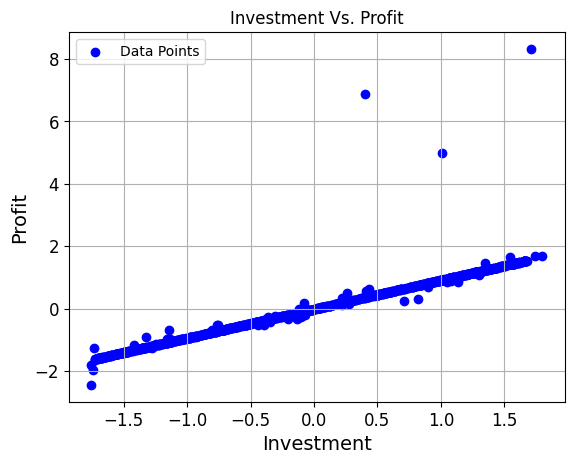

In [45]:
# Write your code here
plt.scatter(X, y, color='blue', marker='o', label='Data Points')

# Customize the plot
plt.title("Investment Vs. Profit")
plt.xlabel("Investment")
plt.ylabel("Profit")
plt.legend(loc="upper left")
plt.grid(True)

# Display the plot
plt.show()

# Training with scikit_learn Linear Regression 



In [56]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Int {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Int [0.00024768]
Coefficient: [[0.94532591]]


# Prediction
Now we can make predictions using the weights.

In [57]:
# Write your code here
y_pred = model.predict(X_test)
print(f"Prediction: {y_pred}")


Prediction: [[-0.70844612]
 [-0.74073991]
 [-0.58756288]
 [ 1.34660963]
 [-0.84298664]
 [-0.19973253]
 [-0.19407045]
 [-0.66859204]
 [ 1.07978446]
 [-1.55365328]]


# Evaluation
Best possible $R^{2}$ score  is 1.0. <br>

In [48]:
# Calculating the R squared value
# Write your code here

r2 = r2_score(y_test, y_pred)
print("R score:", r2)

R score: 0.8058421104257829


# Linear regression using gradient descent
Solve the same problem with gradient descent algorithm

In [58]:
lr = 0.01 
iterations = 1000  
m = len(y_train) 

(intercept, coef) = (0,0)

for iteration in range(iterations):
    h = intercept + coef * X_train

    d_intercept = (1/m) * sum(h - y_train)
    d_coef = (1/m) * sum((h - y_train) * X_train)

    intercept = intercept - lr * d_intercept
    coef = coef - lr * d_coef


y_pred = intercept + coef * X_test
print(f"Prediction: {y_pred}")

r2 = r2_score(y_test, y_pred)
print(f"R score: {r2}")


Prediction: [[-0.70841449]
 [-0.7407069 ]
 [-0.58753641]
 [ 1.34655341]
 [-0.84294926]
 [-0.19972265]
 [-0.19406081]
 [-0.66856211]
 [ 1.07973965]
 [-1.55358552]]
R score: 0.996340269172907


Print out the weight values

In [53]:
# Write your code here
print(f"Intercept: {intercept}")
print(f"Coefficient: {coef}")

Intercept: [-0.0036791]
Coefficient: [0.93685259]


#### 7.
a. During my testing I was only able to get a .81 R score at the highest. I believe this may be due to my scaling being potentially incorrect. Since this data is scaled weirdly with some outliers we cannot get the most accurate without removing them.

b. In order to increase the R score we can decrease the testing size. By setting the testing size to 1% instead of 20% im receiving an R value of over .996 which is almost perfect. However this is certainly overfitting.

In [59]:
# Improved R value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Int {model.intercept_}")
print(f"Coefficient: {model.coef_}")

y_pred = model.predict(X_test)
print(f"Prediction: {y_pred}")

r2 = r2_score(y_test, y_pred)
print("R score:", r2)

Int [0.00024768]
Coefficient: [[0.94532591]]
Prediction: [[-0.70844612]
 [-0.74073991]
 [-0.58756288]
 [ 1.34660963]
 [-0.84298664]
 [-0.19973253]
 [-0.19407045]
 [-0.66859204]
 [ 1.07978446]
 [-1.55365328]]
R score: 0.9963394099567833
